In [1]:
import pandas as pd
import numpy as np
import os
import csv
import pickle
import glob
from itertools import combinations
from collections import defaultdict
from random import sample
import random
import seaborn as sns
import matplotlib.pyplot as plt
# import spearmanr
from scipy.stats import spearmanr

In [2]:
def collect_base_importance(exp_num, task='gilon_activity'):
    base_file_dirs = glob.glob(f"../outputs/{task}/EXP{exp_num}/test_*/channel_test_attention_scores.csv")
    base_file_dirs.sort()

    base_importance_order = []
    for file_dir in base_file_dirs:
        file = pd.read_csv(file_dir).iloc[:,:-1]
        file = file.mean(axis=0)
        # get the importance idx of each channel
        base_importance_order.append(file)
    base_file = pd.concat(base_importance_order, axis=1)
    base_file.columns = [f"fold_{i}" for i in range(1, 6)]
    # base_file = base_file.reset_index()
    # # change the column name
    # base_file = base_file.rename(columns={'index': 'channel'})
    # get the mean of each channel
    base_file['mean'] = base_file.mean(axis=1)
    # create color column and map unique colors to each channel
    color_list = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'orange', 5: 'purple', 6: 'pink', 7: 'brown', 8: 'grey', 9: 'black', 10: 'cyan', 11: 'magenta', 12: 'lime', 13: 'olive'}

    base_file['color'] = base_file.index.astype(int).map(color_list)
    # sort the channel by the mean
    base_file = base_file.sort_values(by='mean', ascending=False)
    # drop the mean column
    base_file = base_file.drop(columns=['mean'])


    return base_file

In [44]:
shufflenet_gilon = collect_base_importance(1100)
resnet_gilon = collect_base_importance(1300)
mlpmixer_gilon = collect_base_importance(1500)
vit_gilon = collect_base_importance(1700)

In [52]:
shufflenet_gilon_qr = collect_base_importance(1200)
resnet_gilon_qr = collect_base_importance(1400)
mlpmixer_gilon_qr = collect_base_importance(1600)
vit_gilon_qr = collect_base_importance(1800)

/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

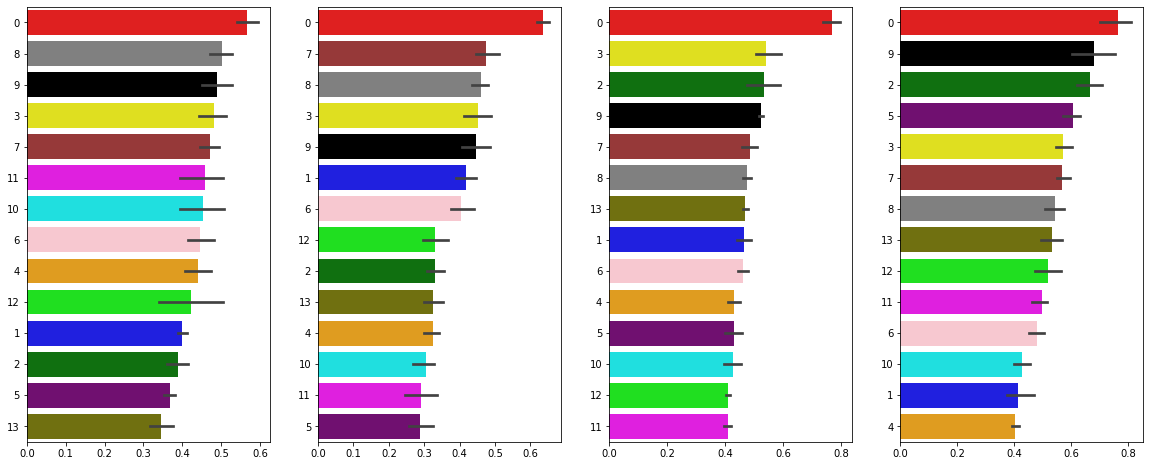

In [51]:
# seaborn barplot for mean importance of each channel
fig, ax = plt.subplots(1, 4, figsize=(20, 8))
# sns.barplot(data=shufflenet_gilon.T, ax=ax, orient='h')
sns.barplot(data=shufflenet_gilon[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[0], orient='h', palette=shufflenet_gilon['color'])
sns.barplot(data=resnet_gilon[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[1], orient='h', palette=resnet_gilon['color'])
sns.barplot(data=mlpmixer_gilon[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[2], orient='h', palette=mlpmixer_gilon['color'])
sns.barplot(data=vit_gilon[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[3], orient='h', palette=vit_gilon['color'])

/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

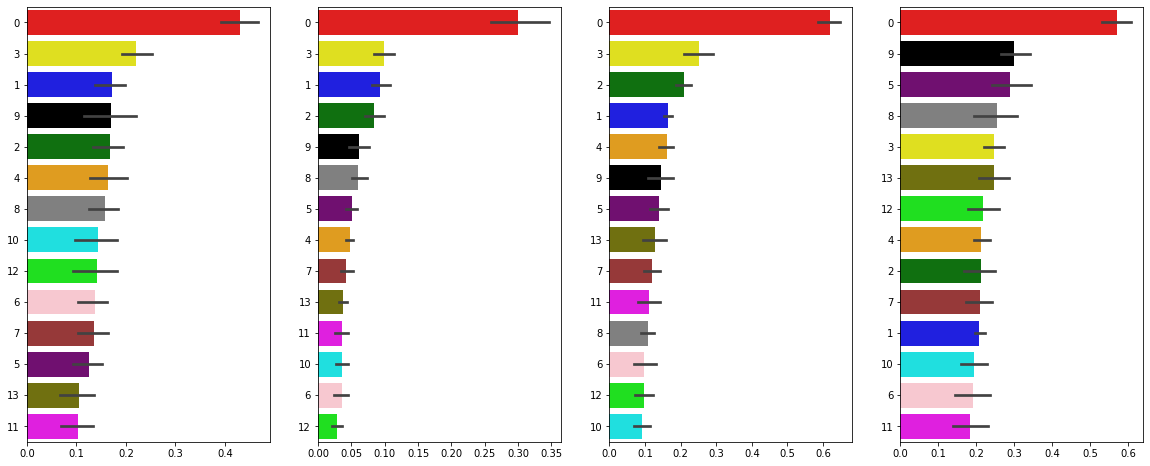

In [53]:
# seaborn barplot for mean importance of each channel
fig, ax = plt.subplots(1, 4, figsize=(20, 8))
# sns.barplot(data=shufflenet_gilon.T, ax=ax, orient='h')
sns.barplot(data=shufflenet_gilon_qr[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[0], orient='h', palette=shufflenet_gilon_qr['color'])
sns.barplot(data=resnet_gilon_qr[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[1], orient='h', palette=resnet_gilon_qr['color'])
sns.barplot(data=mlpmixer_gilon_qr[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[2], orient='h', palette=mlpmixer_gilon_qr['color'])
sns.barplot(data=vit_gilon_qr[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[3], orient='h', palette=vit_gilon_qr['color'])

In [55]:
shufflenet_ms = collect_base_importance(3100, task='microsoft_activity_new')
resnet_ms = collect_base_importance(3300, task='microsoft_activity_new')
mlpmixer_ms = collect_base_importance(3500, task='microsoft_activity_new')
vit_ms = collect_base_importance(3700, task='microsoft_activity_new')

shufflenet_ms_qr = collect_base_importance(3200, task='microsoft_activity_new')
resnet_ms_qr = collect_base_importance(3400, task='microsoft_activity_new')
mlpmixer_ms_qr = collect_base_importance(3600, task='microsoft_activity_new')
vit_ms_qr = collect_base_importance(3800, task='microsoft_activity_new')

In [56]:
color_map = {'red':'#BF4F3D',
             'blue':'#E2CAA0',
             'orange':'#C58672',
             'purple':'#2D606E',
             'green':'#A9B781',
             'yellow':'#414255'}

# map the color to the channel
shufflenet_ms['color'] = shufflenet_ms['color'].map(color_map)
resnet_ms['color'] = resnet_ms['color'].map(color_map)
mlpmixer_ms['color'] = mlpmixer_ms['color'].map(color_map)
vit_ms['color'] = vit_ms['color'].map(color_map)

shufflenet_ms_qr['color'] = shufflenet_ms_qr['color'].map(color_map)
resnet_ms_qr['color'] = resnet_ms_qr['color'].map(color_map)
mlpmixer_ms_qr['color'] = mlpmixer_ms_qr['color'].map(color_map)
vit_ms_qr['color'] = vit_ms_qr['color'].map(color_map)

In [43]:
# change index name
shufflenet_ms.index = [f"F{i}" for i in range(0,6)]
resnet_ms.index = [f"F{i}" for i in range(0,6)]
mlpmixer_ms.index = [f"F{i}" for i in range(0,6)]
vit_ms.index = [f"F{i}" for i in range(0,6)]

shufflenet_ms_qr.index = [f"F{i}" for i in range(0,6)]
resnet_ms_qr.index = [f"F{i}" for i in range(0,6)]
mlpmixer_ms_qr.index = [f"F{i}" for i in range(0,6)]
vit_ms_qr.index = [f"F{i}" for i in range(0,6)]


In [74]:
shufflenet_ms_qr

,fold_1,fold_2,fold_3,fold_4,fold_5,color
0,0.452498,0.371080,0.293640,0.565066,0.486648,#BF4F3D
4,0.166362,0.157386,0.132256,0.282192,0.175501,#C58672
1,0.151315,0.104770,0.117422,0.220076,0.162786,#E2CAA0
5,0.130428,0.121863,0.090889,0.170735,0.131373,#2D606E
2,0.132355,0.124126,0.105488,0.095146,0.117869,#A9B781
3,0.054794,0.062817,0.050266,0.115031,0.091734,#414255


/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


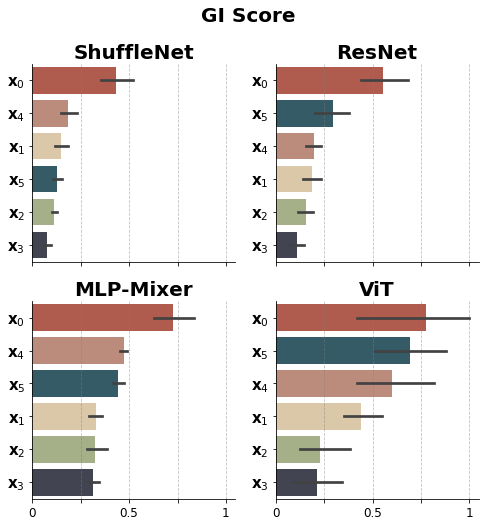

In [79]:
fig, ax = plt.subplots(2,2, figsize=(8, 8),
                       sharex=True)

fig.suptitle('GI Score', fontsize=20, fontweight='bold')
# seaborn barplot for mean importance of each channel
sns.barplot(data=shufflenet_ms_qr[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[0,0], orient='h', palette=shufflenet_ms_qr['color'])
sns.barplot(data=resnet_ms_qr[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[0,1], orient='h', palette=resnet_ms_qr['color'])
sns.barplot(data=mlpmixer_ms_qr[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[1,0], orient='h', palette=mlpmixer_ms_qr['color'])
sns.barplot(data=vit_ms_qr[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[1,1], orient='h', palette=vit_ms_qr['color'])

# set title
fontsize = 20
ax[0,0].set_title('ShuffleNet', fontsize=fontsize, fontweight='bold')
ax[0,1].set_title('ResNet', fontsize=fontsize, fontweight='bold')
ax[1,0].set_title('MLP-Mixer', fontsize=fontsize, fontweight='bold')
ax[1,1].set_title('ViT', fontsize=fontsize, fontweight='bold')

# set x grid
ax[0,0].xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.5)
ax[0,1].xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.5)
ax[1,0].xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.5)
ax[1,1].xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.5)


# Define your tick positions and labels
tick_positions = [0, 0.25, 0.5, 0.75, 1.0]
tick_labels = ['0', '', '0.5', '', '1']
# visualize only 0, 0.5 and 1 for x ticks
ax[1,0].set_xticks(tick_positions)
ax[1,0].set_xticklabels(tick_labels, fontsize=12)
ax[1,1].set_xticks(tick_positions)
ax[1,1].set_xticklabels(tick_labels, fontsize=12)

# remove top and right spines
for i in range(2):
    for j in range(2):
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)


# manually set X tick labels
ax[0,0].set_yticklabels(['$\mathbf{x}_0$', '$\mathbf{x}_4$', '$\mathbf{x}_1$', '$\mathbf{x}_5$', '$\mathbf{x}_2$', '$\mathbf{x}_3$'], fontsize=15, fontweight='bold')
ax[0,1].set_yticklabels(['$\mathbf{x}_0$', '$\mathbf{x}_5$', '$\mathbf{x}_4$', '$\mathbf{x}_1$', '$\mathbf{x}_2$', '$\mathbf{x}_3$'], fontsize=15, fontweight='bold')
ax[1,0].set_yticklabels(['$\mathbf{x}_0$', '$\mathbf{x}_4$', '$\mathbf{x}_5$', '$\mathbf{x}_1$', '$\mathbf{x}_2$', '$\mathbf{x}_3$'], fontsize=15, fontweight='bold')
ax[1,1].set_yticklabels(['$\mathbf{x}_0$', '$\mathbf{x}_5$', '$\mathbf{x}_4$', '$\mathbf{x}_1$', '$\mathbf{x}_2$', '$\mathbf{x}_3$'], fontsize=15, fontweight='bold')

plt.savefig('results/ms_activity/ms_ranks_qr.png', dpi=300, bbox_inches='tight')


/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'ViT')

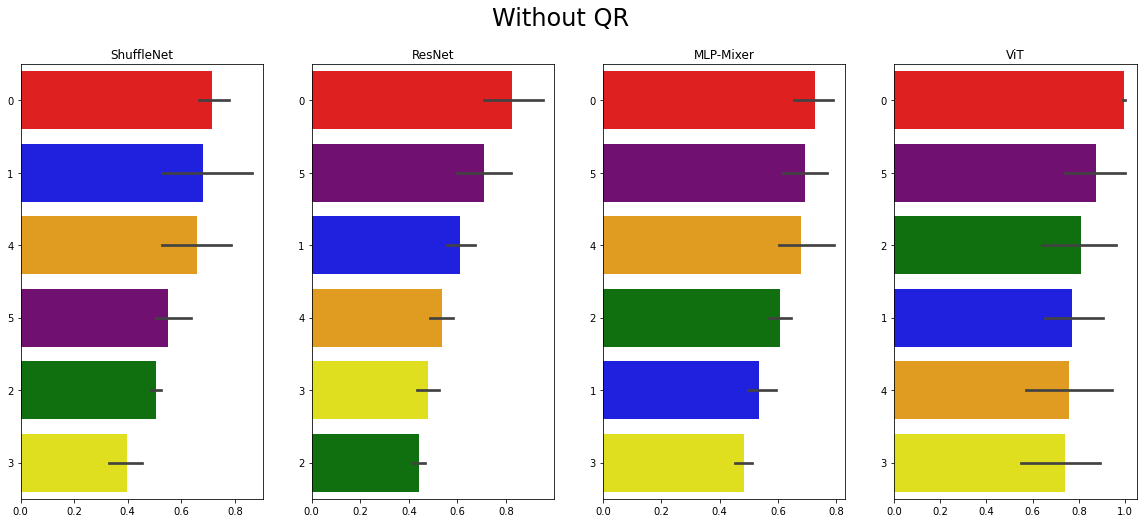

In [59]:
fig, ax = plt.subplots(1, 4, figsize=(20, 8))
# suptitle
fig.suptitle('Without QR', fontsize=24)
# sns.barplot(data=shufflenet_gilon.T, ax=ax, orient='h')
sns.barplot(data=shufflenet_ms[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[0], orient='h', palette=shufflenet_ms['color'])
sns.barplot(data=resnet_ms[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[1], orient='h', palette=resnet_ms['color'])
sns.barplot(data=mlpmixer_ms[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[2], orient='h', palette=mlpmixer_ms['color'])
sns.barplot(data=vit_ms[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[3], orient='h', palette=vit_ms['color'])

# Set title
ax[0].set_title('ShuffleNet')
ax[1].set_title('ResNet')
ax[2].set_title('MLP-Mixer')
ax[3].set_title('ViT')


/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/root/miniconda3/envs/vit/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

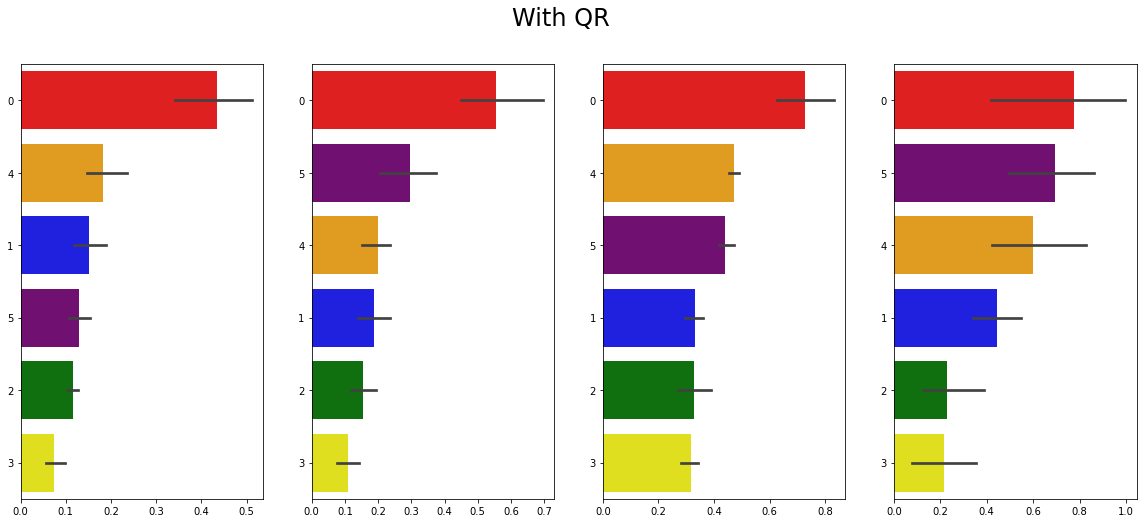

In [60]:
fig, ax = plt.subplots(1, 4, figsize=(20, 8))
fig.suptitle('With QR', fontsize=24)
# sns.barplot(data=shufflenet_gilon.T, ax=ax, orient='h')
sns.barplot(data=shufflenet_ms_qr[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[0], orient='h', palette=shufflenet_ms_qr['color'])
sns.barplot(data=resnet_ms_qr[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[1], orient='h', palette=resnet_ms_qr['color'])
sns.barplot(data=mlpmixer_ms_qr[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[2], orient='h', palette=mlpmixer_ms_qr['color'])
sns.barplot(data=vit_ms_qr[[f"fold_{i}"for i in range(1,6)]].T, ax=ax[3], orient='h', palette=vit_ms_qr['color'])